In [1]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
df = pd.read_csv(r"../../data/processed/dridex_static.csv")

df.drop("Is Encrypted Traffic", axis=1, inplace=True)

## EDA

In [6]:
info = prisma.DatasetInformation(df)

info.dataframe_summary()

### Shape:

(60247, 25)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Source Port,int64,0,0.0
Destination Port,int64,0,0.0
Protocol,object,0,0.0
Flags,object,0,0.0
Packets,int64,0,0.0
Bytes,int64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Mean Entropy,float64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,0


### Categorical

In [4]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,5,TCP,50.01%
1,Flags,13,"PSH,ACK",37.54%
2,Inter-Packet Intervals,60227,[0],0.02%
3,Label,2,Benign,50.01%
4,direction,2,outbound,50.00%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,30127,50.005809
1,TLS,30108,49.974273
2,HTTP,9,0.014939
3,IRC,2,0.003320
4,MEDIA,1,0.001660


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,"PSH,ACK",22614,37.535479
1,"FIN,SYN,ACK",18709,31.053828
2,"SYN,ACK",7512,12.468671
3,"FIN,PSH,ACK",7506,12.458712
4,"SYN,RST,ACK",3373,5.598619
5,"FIN,SYN,RST,ACK",311,0.516208
6,"FIN,SYN,PSH,ACK",187,0.310389
7,"SYN,PSH,ACK",15,0.024898
8,"SYN,RST,PSH,ACK",10,0.016598
9,SYN,5,0.008299


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,30130,50.010789
1,Dridex,30117,49.989211


---

### Column: direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,30126,50.004150
1,inbound,30121,49.995850


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Mean Entropy,Bytes per Packet,Packets per Second,Bytes per Second,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Mean,1.746243,3.155568e+04,3.155186e+04,4.029196,919.451525,249.201135,183.228438,1.749662,249.201135,2.404265e+02,1.000593e+05,0.000183,2.508274,0.500025,0.999900,0.443458,0.000149,0.625027,0.059223,0.000216
Median,0.638203,4.919200e+04,8.343000e+03,4.000000,1137.000000,229.142857,229.211693,1.193895,229.142857,6.981168e+00,6.549637e+02,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Mode,0.016431,4.431000e+03,4.431000e+03,3.000000,182.000000,36.400000,4.800000,0.000000,36.400000,3.029018e+02,1.755619e+05,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Std Dev,9.129087,2.539476e+04,2.539476e+04,0.991027,913.070779,217.398950,197.778849,1.745895,217.398950,1.468785e+04,7.625038e+06,0.013511,0.517009,0.500004,0.009979,0.496797,0.012222,0.484120,0.236043,0.014688
Variance,83.340234,6.448938e+08,6.448941e+08,0.982134,833698.247986,47262.303390,39116.473230,3.048150,47262.303390,2.157330e+08,5.814120e+13,0.000183,0.267298,0.250004,0.000100,0.246807,0.000149,0.234372,0.055716,0.000216
Range,257.057723,6.417500e+04,6.417500e+04,37.000000,52787.000000,1356.026316,630.485527,3.583603,1356.026316,1.000000e+06,1.168000e+09,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,0.000001,8.000000e+01,8.000000e+01,1.000000,34.000000,34.000000,0.000000,0.000000,34.000000,1.663136e-02,8.188486e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,257.057724,6.425500e+04,6.425500e+04,38.000000,52821.000000,1390.026316,630.485527,3.583603,1390.026316,1.000000e+06,1.168000e+09,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Mean Entropy,Bytes per Packet,Packets per Second,Bytes per Second,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Duration,1.000000,-0.011393,-0.005378,0.014311,-0.063297,-0.063530,-0.056493,-0.064404,-0.063530,-0.003101,-0.002497,0.038379,0.027994,0.065209,-0.006289,0.005477,-0.002338,-0.009577,-0.047534,-0.002810
Source Port,-0.011393,1.000000,-0.982354,-0.236167,-0.277295,-0.156632,-0.296294,-0.010559,-0.156632,-0.004545,-0.006756,0.012468,0.011931,0.000084,-0.008635,-0.111822,-0.000313,0.747897,-0.267236,-0.003310
Destination Port,-0.005378,-0.982354,1.000000,0.213545,0.263287,0.154263,0.291648,0.010568,0.154263,-0.000265,0.003238,-0.016748,-0.013264,-0.000067,0.009662,0.120090,-0.002938,-0.767750,0.248256,-0.001396
Packets,0.014311,-0.236167,0.213545,1.000000,-0.066157,-0.392810,-0.288454,-0.528624,-0.392810,-0.043850,-0.034147,-0.007836,0.782940,0.538622,0.013721,0.676129,-0.037362,-0.238489,0.239964,-0.044905
Bytes,-0.063297,-0.277295,0.263287,-0.066157,1.000000,0.912289,0.921521,0.820780,0.912289,-0.005662,-0.000255,-0.009709,-0.085994,-0.811535,0.008767,0.009414,-0.007811,-0.107753,0.539022,-0.008214
Mean Payload Size,-0.063530,-0.156632,0.154263,-0.392810,0.912289,1.000000,0.971012,0.972886,1.000000,0.012572,0.024008,-0.004704,-0.362245,-0.968732,0.009471,-0.252529,0.004880,-0.087186,0.378854,0.010793
Std Payload Size,-0.056493,-0.296294,0.291648,-0.288454,0.921521,0.971012,1.000000,0.905301,0.971012,-0.011699,-0.008381,-0.012362,-0.261226,-0.897803,0.009167,-0.160815,-0.011324,-0.208418,0.407912,-0.013610
Mean Entropy,-0.064404,-0.010559,0.010568,-0.528624,0.820780,0.972886,0.905301,1.000000,0.972886,0.010253,0.012202,-0.001949,-0.491324,-0.999502,0.010002,-0.383428,0.010787,-0.007632,0.255575,0.009044
Bytes per Packet,-0.063530,-0.156632,0.154263,-0.392810,0.912289,1.000000,0.971012,0.972886,1.000000,0.012572,0.024008,-0.004704,-0.362245,-0.968732,0.009471,-0.252529,0.004880,-0.087186,0.378854,0.010793
Packets per Second,-0.003101,-0.004545,-0.000265,-0.043850,-0.005662,0.012572,-0.011699,0.010253,0.012572,1.000000,0.787687,0.501627,-0.015604,-0.015873,-0.113083,-0.009668,0.832007,-0.003917,0.063423,0.999981


### Correlation Matrix Heatmap:

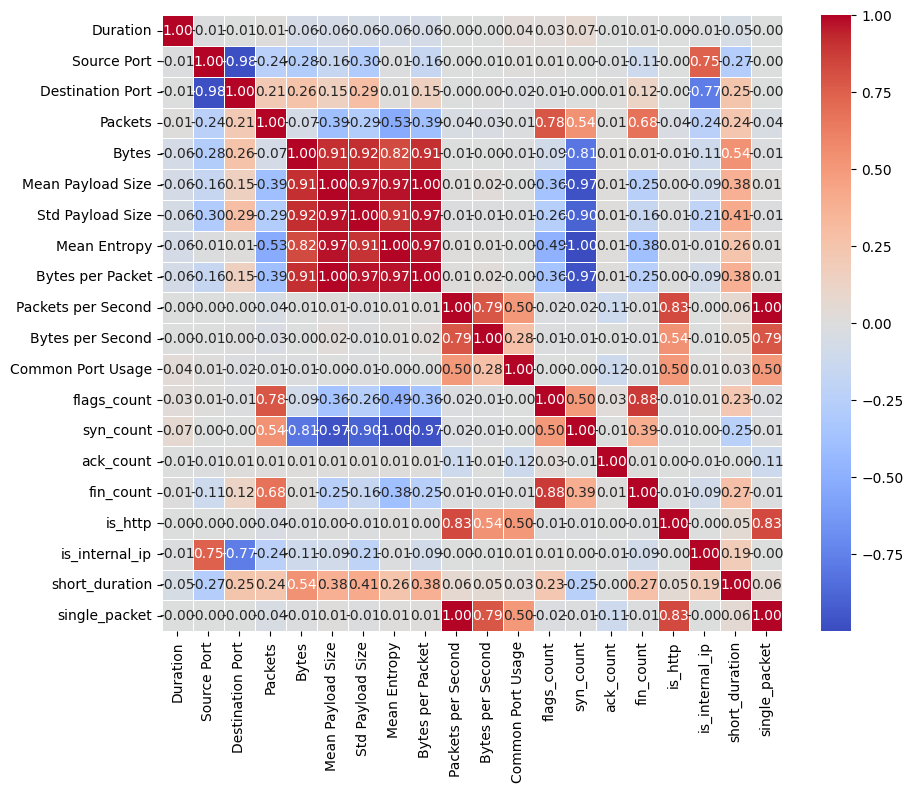

In [5]:
info.numerical_summary()

## Modeling

### Final Data Prep

In [35]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [36]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label", "direction"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    path = "../../../variables/dridex/" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

#### Type Casting

In [37]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["flags_count"] = df["flags_count"].astype("float64")

In [38]:
# df.drop(["Protocol","Packets","Bytes","Duration", "bytes_per_packet","fin_count", "packet_length", "short_duration","Source Port"], axis=1,inplace=True)

### Data Splitting

In [39]:
# Separate the 'Status' column
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

# Initialize and apply MinMaxScaler to the dropped_df
scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())
print(dropped_df.columns)
# Create a DataFrame from the scaled dropped_df
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

# Reattach the 'Status' column
df["Label"] = label_column

save_as_pickle(r"../../../variables/dridex/scaler.pkl", scaler)

Index(['Duration', 'Source Port', 'Destination Port', 'Protocol', 'Flags',
       'Packets', 'Bytes', 'Bytes per Packet', 'Packets per Second',
       'Bytes per Second', 'Is Encrypted Traffic', 'Common Port Usage',
       'flags_count', 'syn_count', 'ack_count', 'fin_count', 'is_http',
       'is_internal_ip', 'direction', 'short_duration', 'single_packet'],
      dtype='object')


## Models

### Model Creation and Parameters

In [40]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_neighbors = 5
knn_train_model = KNeighborsClassifier(n_neighbors=n_neighbors)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Logistic Regression
max_iter = 5000
logreg_model = LogisticRegression(max_iter=max_iter)

### Splitting

In [41]:
# Reset the index to convert it to a normal column (if needed)
df_reset = df.reset_index(drop=True)  # This will drop the old index column
X = df_reset.drop("Label", axis=1)  # Now drop the Label
if 'index' in X.columns:
    X.drop('index', axis=1, inplace=True)
y = df["Label"]

### KNN

In [45]:
knn_normal = prisma.MachineLearning()
knn_normal_metrics, avg_knn_normal_metrics, knn_normal_model = (
    knn_normal.evaluate_model(X, y, test_size, iterations, knn_train_model)
)

Evaluating model: 100%|██████████| 30/30 [00:56<00:00,  1.88s/it]


### Random Forest

In [46]:
rf_normal = prisma.MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

Evaluating model:   3%|▎         | 1/30 [00:16<08:08, 16.85s/it]


KeyboardInterrupt: 

### Logistic Regression

In [13]:
logreg_normal = prisma.MachineLearning()
(
    logreg_normal_metrics,
    avg_logreg_normal_metrics,
    logreg_normal_model,
) = logreg_normal.evaluate_model(X, y, test_size, iterations, logreg_model)

Evaluating model: 100%|██████████| 30/30 [00:14<00:00,  2.00it/s]


### Model Evaluation

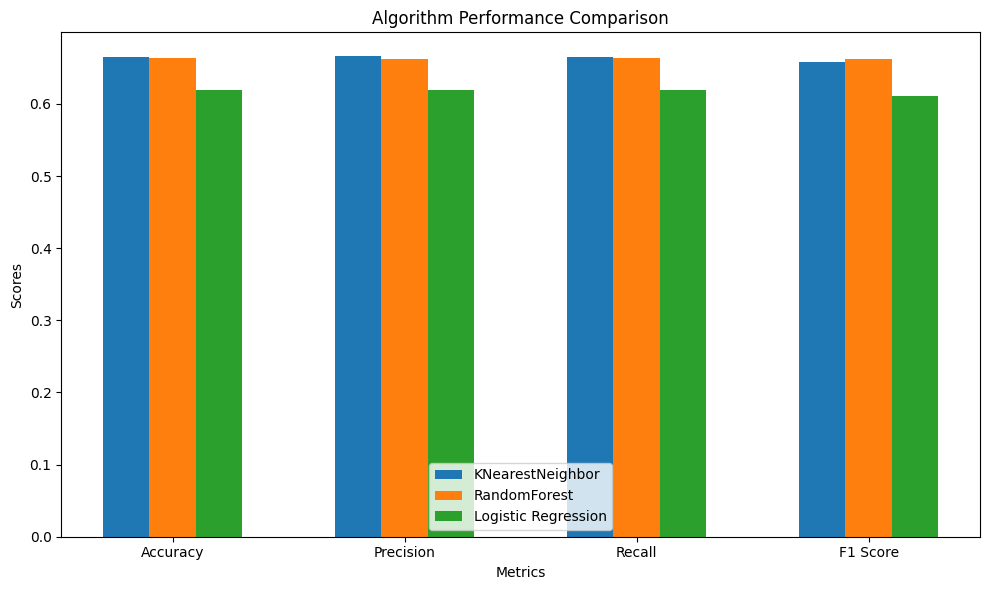

In [20]:
normal_metrics = {"KNearestNeighbor":avg_knn_normal_metrics, "RandomForest":avg_rf_normal_metrics, "Logistic Regression":avg_logreg_normal_metrics}
plot = prisma.Plotting(df)

plot.plot_algorithm_comparison(normal_metrics)

In [21]:
normal_metrics

{'KNearestNeighbor': {'Accuracy': 0.665,
  'Precision': 0.666,
  'Recall': 0.665,
  'F1 Score': 0.658},
 'RandomForest': {'Accuracy': 0.664,
  'Precision': 0.663,
  'Recall': 0.664,
  'F1 Score': 0.663},
 'Logistic Regression': {'Accuracy': 0.62,
  'Precision': 0.619,
  'Recall': 0.62,
  'F1 Score': 0.611}}

In [28]:
save_as_pickle(r"../../models/Rbot_KNN.pkl", knn_normal_model)

In [14]:
avg_logreg_normal_metrics


{'Accuracy': 0.708, 'Precision': 0.714, 'Recall': 0.708, 'F1 Score': 0.706}

In [14]:
logreg_normal_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.649506,0.649917,0.649506,0.640054
1,0.649177,0.649772,0.649177,0.639442
2,0.653580,0.654612,0.653580,0.644004
3,0.655021,0.654900,0.655021,0.646049
4,0.657490,0.659232,0.657490,0.647032
5,0.655226,0.656071,0.655226,0.645374
6,0.652263,0.654527,0.652263,0.641593
7,0.650247,0.650884,0.650247,0.641693
8,0.654774,0.655939,0.654774,0.645494
9,0.651811,0.652044,0.651811,0.642195


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the heatmap
plt.show()

ValueError: could not convert string to float: 'TCP'

In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

# Define the XGBoost classifier with default settings
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=1.2,
    max_depth=3,
    alpha=0.09,  # L1 regularization
    reg_lambda=0.09,        # L2 regularization (formerly lambda_)
    n_estimators=100,  # Control the number of trees
    learning_rate=0.125,  # Decreased learning rate
    subsample=0.8,  # Use 80% of data for training each tree
    colsample_bytree=0.8,  # Use 80% of features for training each tree
    random_state=23  # For reproducibility
)
#! 0.1, 0.11,
# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.9912038061518035
Confusion Matrix:
 [[8997   44]
 [ 115 8920]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9041
           1       1.00      0.99      0.99      9035

    accuracy                           0.99     18076
   macro avg       0.99      0.99      0.99     18076
weighted avg       0.99      0.99      0.99     18076



In [43]:
# Check the performance on the training data
y_train_pred = xgb_model.predict(X_train)

# Evaluate on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# You already have test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9921517486662715
Test Accuracy: 0.9912038061518035


In [44]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5)

# Print the average accuracy across the folds
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy: 0.9886806769707306


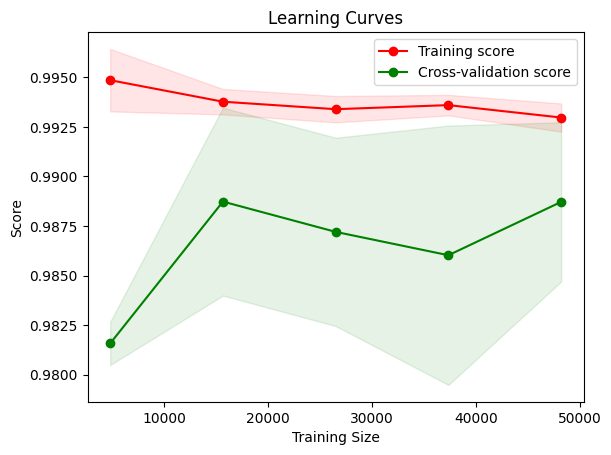

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()


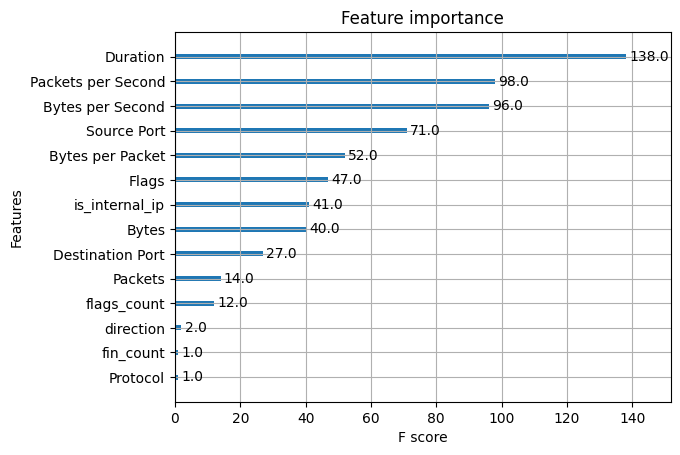

In [46]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [47]:
save_as_pickle(r"../../models/dridex/xgb.pkl", xgb_model)

In [21]:
save_as_pickle(r"../../models/emotet/logreg.pkl", logreg_normal_model)